In [30]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [98]:
def explicit_first(u_array,j,delta_x,delta_t,v):
    if j == 0:
        left = 0
        right = 1
    elif j == len(u_array)-1:
        left = j-1
        right = 1
    else:
        left = j-1
        right = j+1
    return u_array[j]+((v*delta_t)/(delta_x*delta_x))*(u_array[right]+u_array[left]-2*u_array[j])

def equation_w_sum(x,t,v,n):
    return math.sin((math.pi)*n/2)*math.sin(math.pi*n*x)*math.exp(-1*pow(math.pi*n,2)*v*t)

def analytic_solution(x,t,v):
    array = [equation_w_sum(x,t,v,n) for n in range(0,100)]
    return 2*np.sum(array)

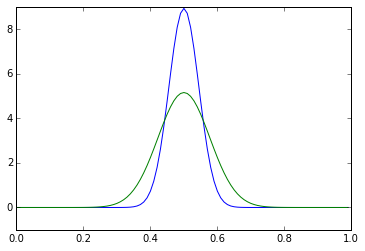

In [99]:
# initial conditions
delta_x = 0.1
delta_t = 0.1
v = 0.001
t = 1
positions = np.arange(0,1,0.01)
u_array = [analytic_solution(x,t,v) for x in positions]
t = 3
new_u_array = [analytic_solution(x,t,v) for x in positions]

plt.plot(positions,u_array,positions,new_u_array)

In [108]:
# now we increment in time
time = np.arange(1,3,0.1)

v = 0.001
delta_x = 0.1
delta_t = 0.1

previous_array = u_array

for t in time:
    data = []
    for j,x in enumerate(positions):
        data.append(explicit_first(previous_array,j,delta_x,delta_t,v))
    previous_array = data
    print(len(previous_array))


100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100


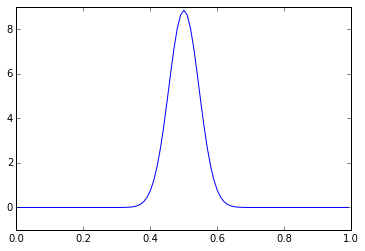

In [109]:
plt.plot(positions,data)